# Лабараторная работа 1. Траектория движения тела
Вычислительная практика 2. ММФ. 5 группа
Бельская Екатерина. март 2020

# Постановка задачи

Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и на высоте $h_{end}$. Движение тела осуществляется под действием силы тяжести $$\mathbf{F}=m(0,-g),$$ где *m* — масса тела, *g* — ускорение свободного падения. Сопротивление среды пренебрегаем.
Дано $h_{start}$ = 10 m, $T$ = 2.5 s, $s_{end}$ = 55 m, $h_{end}$ = 12 m, $\approx$ 9.807 m/s$^2$. Найдите угол запуска тела $\alpha$.
Обозначим через $s_x(t)$ и $s_y(t)$ горизонтальное и вертикальное положение тела в момент времени *t*, соответственно. Постройте траекторию движения тела $(s_x(t),s_y(t))$ для $ t \in [0,T]$, где начальный момент времени движения полагается равным нулю.

## Реализация

### Этап 1. Подключение библиотек и модулей

Подключем модуль **math** с математическими функциями.


In [ ]:
import math as mth 

Для обращения к содержимому модуля используется синтакстис с "точкой": <имя объекта модуля>.<имя функции>

In [2]:
mth.sin(mth.pi/2)

1.0

Подключим библиотеку **numpy** для работы со структурой данных массив (**ndarray**). Тип последовательности массив не является встроенным типом данных Python, а определен базовым типом данных библиотеки numpy.

In [3]:
import numpy as np

Подключим модуль **pyplot** библиотеки **matplotlib** для работы с графикой

In [4]:
import matplotlib.pyplot as plt

In [6]:
# необходимо для визуализации графиков внутри Jupyter Nootbook 
%matplotlib inline
# необходимо для создания интерактивных графиков
%matplotlib notebook

### Этап 2. Определение переменных

Интрукция присваивания (=) создает ссылку на объект: <ссылка> = <объект>. Переменные создаются при первом присваивании. Объявлять переменные не нужно. Нельзя использовать переменную, которой не присвоено значение.


In [7]:
h_start = 10 # высота положения тела в момент запуска

In [8]:
T = 2.5 # время полета
s_end = 5.5e1 # горизонтальное перемещение тела за время полета
h_end = 1.2E+1 # высота положения тела в конечный момент движения
g = 9.807 # ускорение свободного падения
h_start,T,s_end,h_end,g

(10, 2.5, 55.0, 12.0, 9.807)

Если в записи числа обнаруживается точка или экспонента, то интерпретатор Python создает объект типа вещественное число и использует вещественные (не целочисленные) вычисления, когда такой объект участвует в выражении.

Проверка типов

In [9]:
type(h_start), type(h_end) 

(int, float)

С помощью функции **arange** библиотеки numpy создадим массив равномерно распределенных чисел на отрезке $[0,𝑇]$ с шагом 0.01

In [10]:
t = np.arange(0,T,0.01) 

In [11]:
type(t)

numpy.ndarray

**Важно**: после создания массива его размер изменить нельзя!

### Этап 3. Построение функции перемещения

Помещаем начало прямоугольной декартовой системы координат в начальный момент движения на уровне земли, тогда $s_x(0)=0$,$s_y(0)=h_{start}$.

Для построения функции перемещения $(s_x(t),s_y(t))$ воспользуемся вторым законом Ньютона $$ m \mathbf{a}=\mathbf{F},$$ где ускорение движения тела $ \mathbf{a}=(s''_x(t),s''_y(t))$ и приложенная сила $\mathbf{F}= m(0,-g)$.

Из второго закона Ньютона имеем $$s_x(t)=s_x(0)+v0_xt=0+v0_xt,$$
$$s_y(t)=s_y(0)+v0_yt-\frac{g}{2}t^2=h_{start}+v0_yt-\frac{g}{2}t^2,$$
где **v0**=$(v0_x,v0_y)$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0$.

Функция перемещения имеет такой вид потому что на тело действуют два параментра(силы). Первая параметр это погоризонтали те по $O_x$. Тело брошено и этот параметр можно выписать как обычное прямолинейное движение в виде линейного уравнения. Второй параметр это вертикальный. Тело падает вниз и на него действует притяжение земли. Оно падает с ускорением. Движение с ускорением представляется в виде квадратичной функции.

Из заданного соотношения $s_x(T)=s_{end}$ находим значение для $v0_x$.

In [13]:
v0_x = s_end/T; v0_x

22.0

Из заданного соотношения $s_y(T)=h_{end}$ находим значение для $v0_y$.

In [14]:
v0_y = (h_end-h_start+g/2*T**2)/T; v0_y

13.05875

Значение угла $\alpha$ определяем из соотношения $tan\alpha=\frac{v0_y}{v0_x}$.

In [15]:
alpha = mth.atan(v0_y/v0_x)
(alpha,mth.degrees(alpha))

(0.53568520293127, 30.692501275570805)

### Этап 4. График траектории движения

Построение графиков функций осуществляется по координатам точек графика. Для этого можно создать массив значений $x$-координат точек графика функции и массив соответствующих значений $y$-координат точек графика функции.

На Этапе 2 создан массив чисел со значениями переменной времени.

In [16]:
t;

Определим массивы чисел, соответствующие горизонтальному и вертикальному положению тела в момент времени $t$.

In [17]:
s_x = v0_x*t
s_y = h_start+v0_y*t-g*t**2/2

Строим график параметрически заданной функции $(s_x(t),s_y(t))$ средствами модуля **pyplot** библиотеки **matplotlib**

<IPython.core.display.Javascript object>


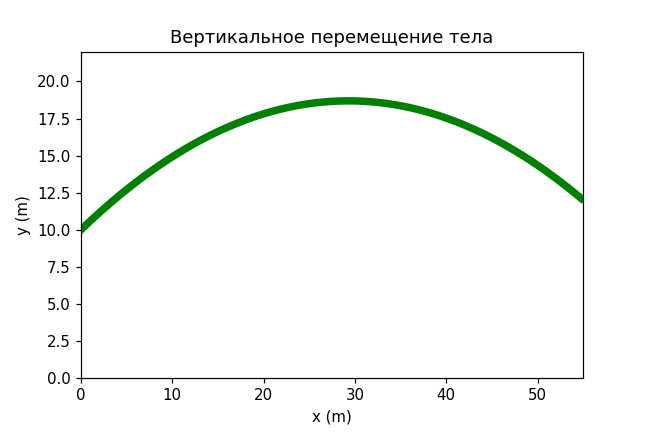

In [18]:
plt.plot(s_x,s_y,'b-',color='green',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([0, s_end, 0, h_end+10]);

# Построение графиков заданных функций

## Пример

<IPython.core.display.Javascript object>


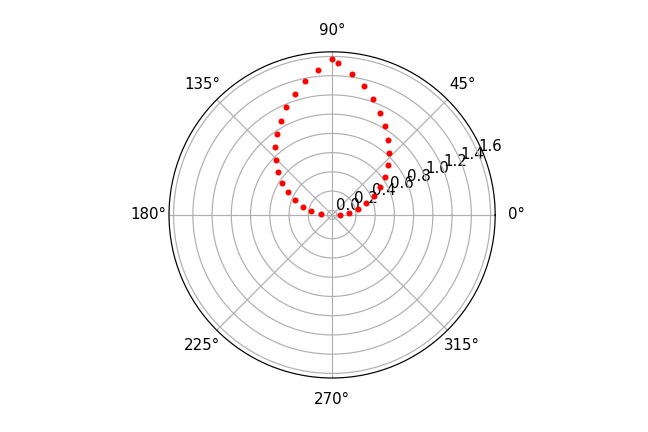

In [19]:
fig = plt.figure();
ax = plt.axes(projection='polar'); 
phi = np.arange(-np.pi/2, np.pi/2, 0.1)
r = phi
plt.plot(phi + (r<0)*np.pi,abs(r),'r.')

## Вариант 2

a) *Роза* $\rho = a\sin{(\frac{m}{n}\phi)}$, $a\in\mathbb{R}$, *m*, *n* -- натуральные нечётные, $m \neq n$ 

In [100]:
a, m, n = 1, 6, 1

<IPython.core.display.Javascript object>


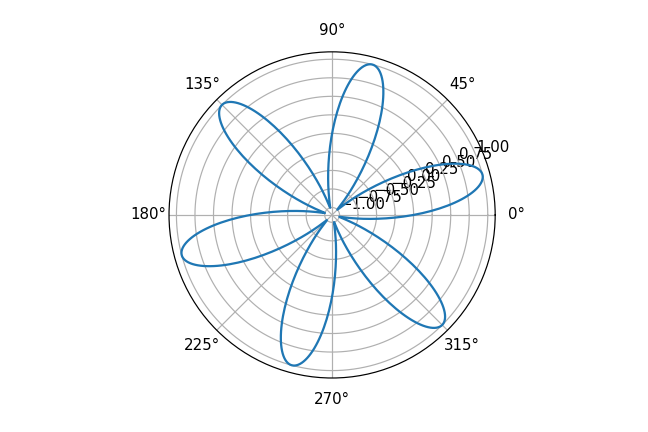

In [103]:
fig = plt.figure();
ax = plt.axes(projection='polar'); 
phi = np.arange(0, (2*np.pi), 0.01)
r = phi
plt.plot(r, a*np.sin(m/n*r))

б) $ x= \sqrt{1-t^2}$, $ y=\tan{\sqrt{1+t}}$

<IPython.core.display.Javascript object>


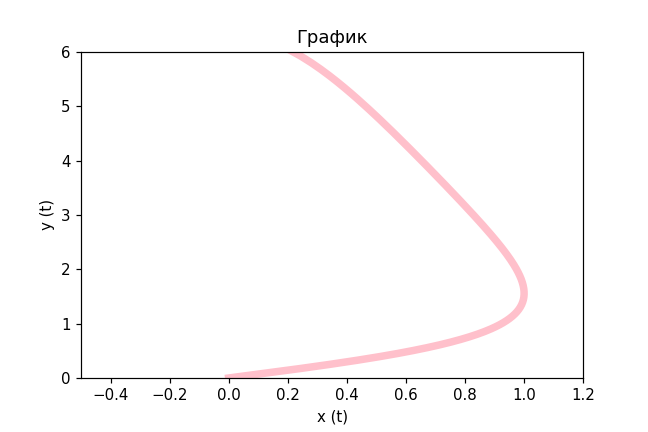

In [133]:
fig = plt.figure();
ax = plt.axes();
t = np.arange(-1, 1, 0.01)
x_t = (1-t**2)**0.5
y_t = np.tan((1+t)**0.5)
plt.plot(x_t,y_t,'b-',color='pink',lw=5)
plt.title('График')

plt.xlabel('x (t)'); plt.ylabel('y (t)')

plt.axis([-0.5, 1.2, 0, 6]);